### Analysis of urma performance on Go2 and Gendog12

In [8]:
import json
with open("eval_student_model_urma_detailed.json", "r") as f:
    log_data = json.load(f)

In [60]:
print("Gendog12 reward is", log_data['Gendog12']['average_return'])
print("Go2-Direct-v0 reward is", log_data['Go2-Direct-v0']['average_return'])

Gendog12 reward is 65.38166809082031
Go2-Direct-v0 reward is 26.44757843017578


In [29]:
with open("eval_student_model_urma_detailed_Go2_with_Gendog12_description_vec.json", "r") as f:
    log_data2 = json.load(f)

In [59]:
print("Go2-Direct-v0 with Gendog12 robot_description_vec.json reward is", log_data2['Go2-Direct-v0']['average_return'])

Go2-Direct-v0 with Gendog12 robot_description_vec.json reward is 44.74482345581055


In [56]:
import matplotlib.pyplot as plt

def plot_rewards_single(reward_dict, label=None):
    """
    Plots reward values from a single reward dictionary.
    
    Args:
        reward_dict (dict): A dictionary where keys are reward names and values are lists of rewards over time.
        label (str, optional): A label for the entire dataset (useful when comparing multiple reward sets).
    """
    num_rewards = len(reward_dict)
    fig, axes = plt.subplots(nrows=num_rewards, ncols=1, figsize=(10, 3 * num_rewards), sharex=True)
    
    if num_rewards == 1:
        axes = [axes]  # Ensure axes is iterable when there is only one subplot

    for ax, (reward_name, reward_values) in zip(axes, reward_dict.items()):
        ax.plot(reward_values, label=label if label else reward_name)
        ax.set_title(reward_name)
        ax.legend()
        ax.grid()

    plt.xlabel("Time Steps")
    plt.tight_layout()
    plt.show()

def plot_rewards_multiple(reward_dicts, reward_names):
    """
    Plots multiple reward curves for each reward category.
    
    Args:
        reward_dicts (list of dicts): A list of reward dictionaries (each corresponding to one training instance).
        reward_names (list of str): Names corresponding to each reward dictionary (e.g., ['Run1', 'Run2', 'Run3']).
    """
    assert len(reward_dicts) == len(reward_names), "Number of reward dicts must match the number of reward names"

    # Collect all unique reward keys
    reward_keys = reward_dicts[0].keys()
    num_rewards = len(reward_keys)

    fig, axes = plt.subplots(nrows=num_rewards, ncols=1, figsize=(10, 3 * num_rewards), sharex=True)

    if num_rewards == 1:
        axes = [axes]  # Ensure axes is iterable when there is only one subplot

    for ax, reward_key in zip(axes, reward_keys):
        for i, reward_dict in enumerate(reward_dicts):
            ax.plot(reward_dict[reward_key], label=reward_names[i])  # Use provided names
        ax.set_title(reward_key)
        ax.legend()
        ax.grid()

    plt.xlabel("Time Steps")
    plt.tight_layout()
    plt.show()


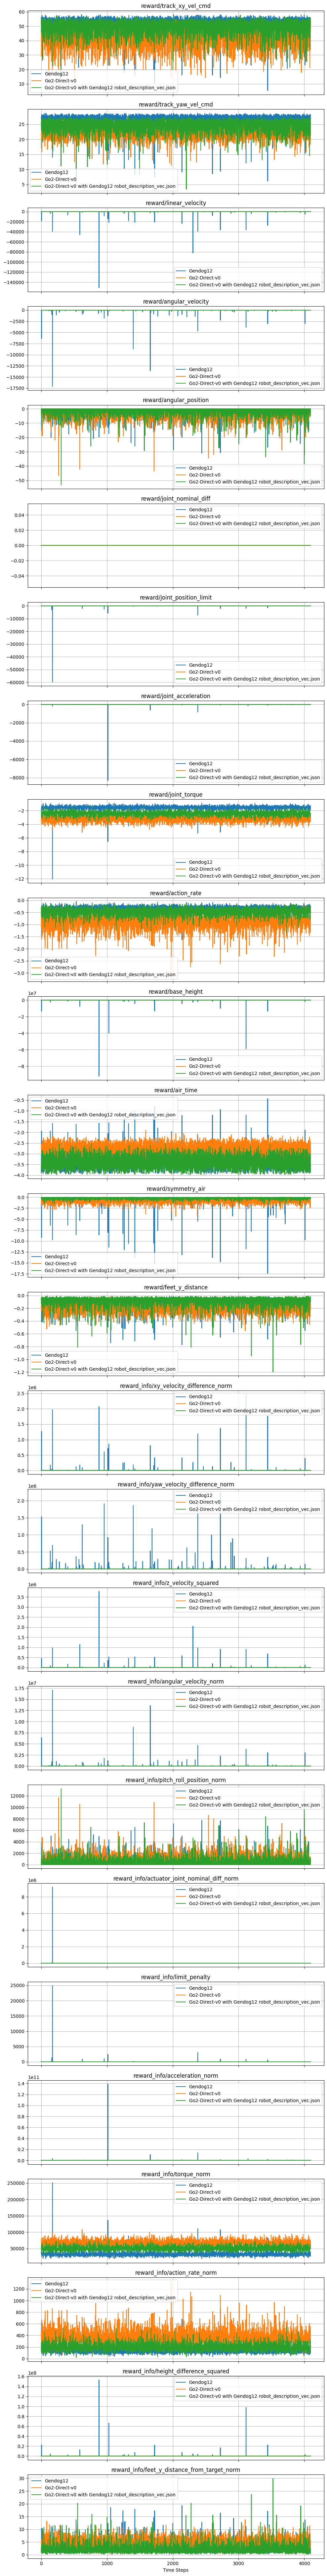

In [61]:
reward_dicts = [log_data['Gendog12']['reward_extras'], log_data['Go2-Direct-v0']['reward_extras'], log_data2['Go2-Direct-v0']['reward_extras']]
reward_labels = ['Gendog12', 'Go2-Direct-v0', 'Go2-Direct-v0 with Gendog12 robot_description_vec.json']
plot_rewards_multiple(reward_dicts, reward_labels)